# Import Libraries & Data 

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# establish path to project folder
path = r'C:\Users\BrianDavis\OneDrive - abetterchicago.org\Documents\Data Analysis\Achievement 5 (Python)\04-2023 Instacart Basket Analysis'

In [4]:
# import dataframe
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers.pkl'))

# Manipulate Data 

### Step 2 - Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

#### Observation: there is personal identifying information (PII) in the form of customer first names and last names. This is particularly sensitive given the family size and income information attached to each individual, as this is very private information. I would flag this PII to my superviser to see how they would like me to handle it (including by deleting the first name and last name columns). Without this direction from my superviser, I don't know the preferred way to handle this information, and so I've left it in for purposes of this assignment.  

### Step 3 - The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [5]:
#create a for-loop that creates a new column which sorts states into regions

result = []
for value in df['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result.append("Northeast")
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append("Midwest")
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        result.append("West")
    else: 
        result.append("South")

df['Region'] = result

In [6]:
#check values of regions column
df['Region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [7]:
#create a crosstab variable to understand difference in spending habits across regions 
crosstab = pd.crosstab(df['Region'], df['spending flag'], dropna = False)

In [8]:
#call crosstab variable
crosstab

spending flag,High spender,Low spender
Region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40564,10751321
West,31223,8261690


#### Observation: there doesn't appear to be a regional difference in spending habits between the different U.S. regions. There is the highest number of High spenders in the South region, followed by West, Midwest and Northeast, but the size is proportional to the number of customers in each region (ie the South has the greatest number of Low spenders as well, followed by West, Midwest and Northeast. 

### Step 4 - The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [9]:
#create for loop that creates new column to flag for exclusion those customers with less than 5 orders
result_2 = []
for value in df['order_frequency']:
    if value < 5:
        result_2.append("Exclude")
    else:
        result_2.append("Include")

df['frequency_exclusion'] = result_2

In [10]:
#check values of new column
df['frequency_exclusion'].value_counts()

Include    27811929
Exclude     4592930
Name: frequency_exclusion, dtype: int64

In [14]:
#create new dataframe that excludes low frequency customers
df_2 = df[df.frequency_exclusion == 'Include']

### Step 5 - The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

In [22]:
#create age flag
result_3 = []

for value in df_2['age']:
    if value <= 35:
        result_3.append('Young Adult')
    elif value <= 65:
        result_3.append('Middle Age')
    else:
        result_3.append('Older')

df_2['Profile_Age'] = result_3

C:\Users\BrianDavis\AppData\Local\Temp\ipykernel_40872\466362704.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Profile_Age'] = result_3


In [19]:
#check values of age flag
df_2['Profile_Age'].value_counts()

Middle Age      13017446
Young Adults     7866318
Older            6928165
Name: Profile_Age, dtype: int64

In [35]:
#create income flag
result_4 = []

for value in df_2['income']:
    if value <= 100000:
        result_4.append('Low Income')
    elif value <= 200000:
        result_4.append('Middle Income')
    else:
        result_4.append('High Income')

df_2['Profile_Income'] = result_4

C:\Users\BrianDavis\AppData\Local\Temp\ipykernel_40872\420644328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Profile_Income'] = result_4


In [36]:
#check values of income flag
df_2['Profile_Income'].value_counts()

Low Income       15142496
Middle Income    12456613
High Income        212820
Name: Profile_Income, dtype: int64

In [26]:
#create dependants flag
result_5 = []

for value in df_2['n_dependants']:
    if value == 0:
        result_5.append('No Kids')
    else:
        result_5.append('Parent')

df_2['Profile_Dependants'] = result_5

C:\Users\BrianDavis\AppData\Local\Temp\ipykernel_40872\3485773763.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Profile_Dependants'] = result_5


In [27]:
#check values of dependents flag
df_2['Profile_Dependants'].value_counts()

Parent     20876495
No Kids     6935434
Name: Profile_Dependants, dtype: int64

In [28]:
#create flag for purchases of food & beverages versus other (depts 2, 8, 11, 17 and 18 represent "other")
result_6 = []

for value in df_2['department_id']:
    if value in [2, 8, 11, 17, 18]:
        result_6.append('non_food_bev')
    else:
        result_6.append('food_bev')

df_2['Profile_foodbev'] = result_6

C:\Users\BrianDavis\AppData\Local\Temp\ipykernel_40872\3921661287.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Profile_foodbev'] = result_6


In [29]:
df_2['Profile_foodbev'].value_counts()

food_bev        26317073
non_food_bev     1494856
Name: Profile_foodbev, dtype: int64

### Step 6 - Create an appropriate visualization to show the distribution of profiles.

#### Age Profiles

<Axes: >

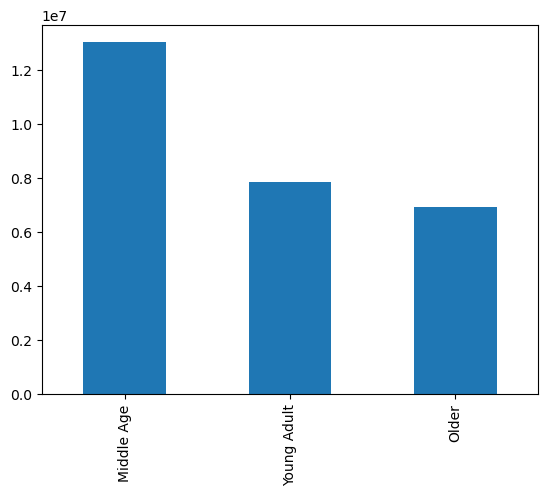

In [30]:
bar = df_2['Profile_Age'].value_counts().plot.bar()

#### Income Profiles

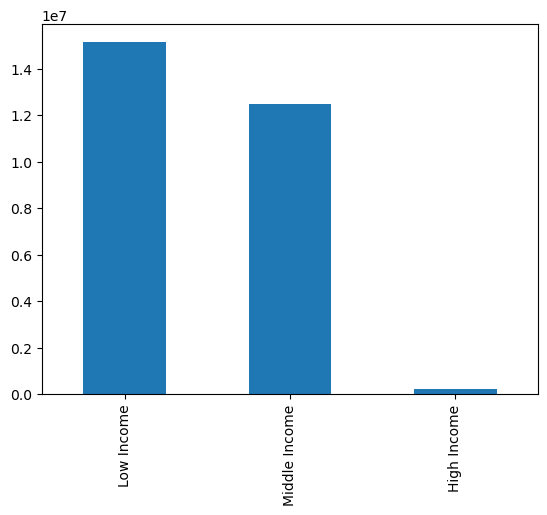

In [37]:
bar = df_2['Profile_Age'].value_counts().plot.bar()

#### Dependants Profiles

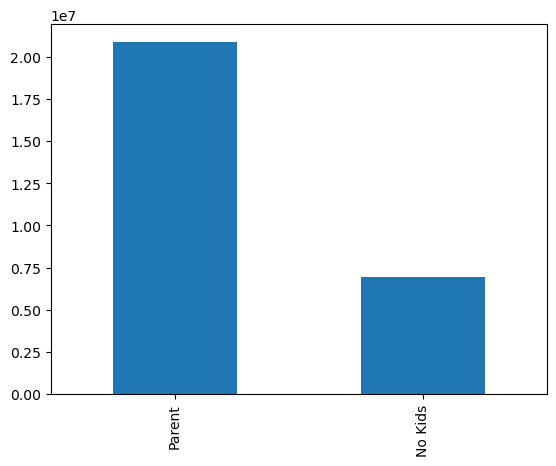

In [38]:
bar = df_2['Profile_Dependants'].value_counts().plot.bar()

#### Profiles of Purchases of Food & Beverages

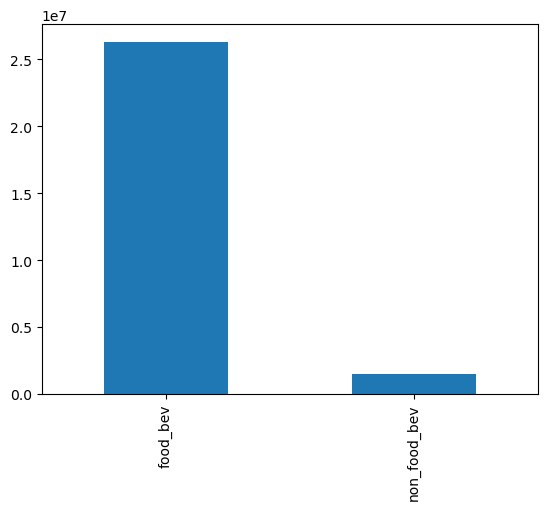

In [39]:
bar = df_2['Profile_foodbev'].value_counts().plot.bar()

### Step 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [44]:
#average, minimum and maximum order frequency by customer age
df_2.groupby('Profile_Age').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                       mean  min   max
Profile_Age                           
Middle Age        11.583867  5.0  30.0
Older             11.542534  5.0  30.0
Young Adult       11.569361  5.0  30.0

In [45]:
#average, minimum and maximum order frequency by customer income
df_2.groupby('Profile_Income').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                          mean  min   max
Profile_Income                           
High Income          10.476158  5.0  30.0
Low Income           11.651829  5.0  30.0
Middle Income        11.488027  5.0  30.0

In [46]:
#average, minimum and maximum order frequency by customer's number of dependants
df_2.groupby('Profile_Dependants').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                              mean  min   max
Profile_Dependants                           
No Kids                  11.553836  5.0  30.0
Parent                   11.574661  5.0  30.0

In [47]:
#average, minimum and maximum order frequency by food & beverage vs. non-food & beverages orders
df_2.groupby('Profile_foodbev').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                           mean  min   max
Profile_foodbev                           
food_bev              11.550201  5.0  30.0
non_food_bev          11.908674  5.0  30.0

In [48]:
#average, minimum and maximum prices by customer age
df_2.groupby('Profile_Age').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
Profile_Age                     
Middle Age   7.790436  1.0  25.0
Older        7.792456  1.0  25.0
Young Adult  7.782905  1.0  25.0

In [49]:
#average, minimum and maximum prices by customer income
df_2.groupby('Profile_Income').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
Profile_Income                     
High Income     7.714019  1.0  25.0
Low Income      7.644464  1.0  25.0
Middle Income   7.965555  1.0  25.0

In [50]:
#average, minimum and maximum prices by customer's number of dependants
df_2.groupby('Profile_Dependants').agg({'prices': ['mean', 'min', 'max']})

prices           
                        mean  min   max
Profile_Dependants                     
No Kids             7.787369  1.0  25.0
Parent              7.789288  1.0  25.0

In [51]:
#average, minimum and maximum prices by food & beverage vs. non-food & beverages orders
df_2.groupby('Profile_foodbev').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
Profile_foodbev                     
food_bev         7.798145  1.0  25.0
non_food_bev     7.624451  1.0  15.0

### Step 8 - Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

#### Crosstabs between customer profiles and region

In [54]:
#create crosstab to analyze income by region 
cross_inc_reg = pd.crosstab(df_2['Region'], df_2['Profile_Income'], dropna = False)

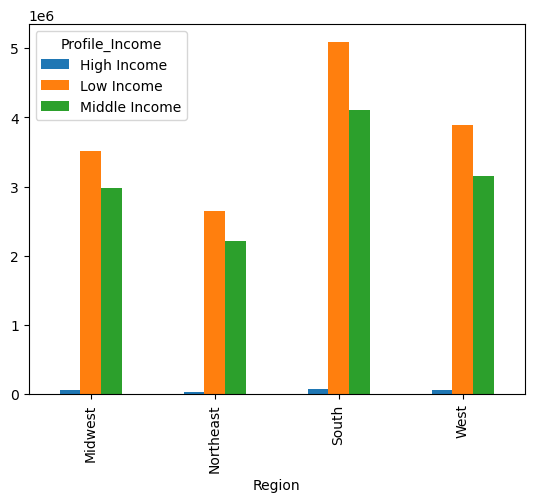

In [56]:
#visualize results
bar_inc_reg = cross_inc_reg.plot.bar()

#### Observations: there is a slightly higher proportion of low income customers in the South region as compared to the Northeast and Midwest. 

In [57]:
#create crosstab to analyze age by region 
cross_age_reg = pd.crosstab(df_2['Region'], df_2['Profile_Age'], dropna = False)

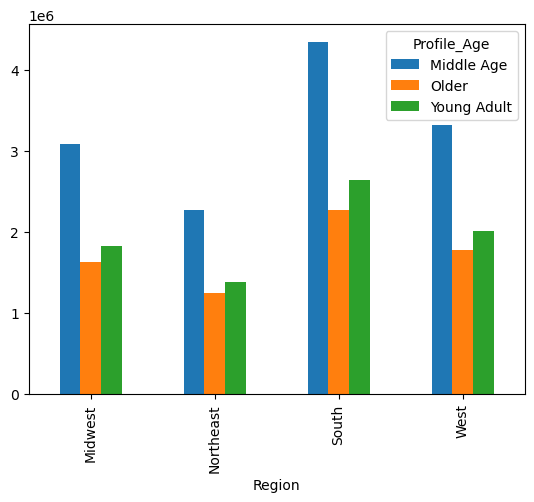

In [58]:
#visualize results
bar_age_reg = cross_age_reg.plot.bar()

#### Observations: there is a similar distribution of customers' ages across regions; there is a slightly higher proportion of young adults in the South region as compared to the Northeast and Midwest.  

In [59]:
#create crosstab to analyze family status by region 
cross_dep_reg = pd.crosstab(df_2['Region'], df_2['Profile_Dependants'], dropna = False)

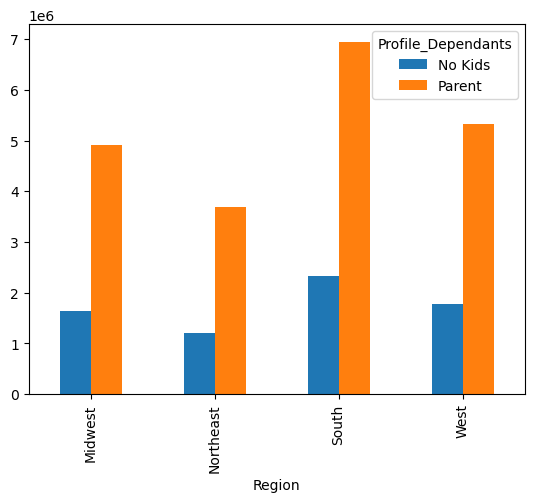

In [60]:
#visualize results
bar_dep_reg = cross_dep_reg.plot.bar()

#### Observation: there is a similar distribution of family status (as defined as whether a customer has dependants or not) across regions

In [61]:
#create crosstab to analyze purchases of food & beverage vs non-food & beverage items 
cross_fb_reg = pd.crosstab(df_2['Region'], df_2['Profile_foodbev'], dropna = False)

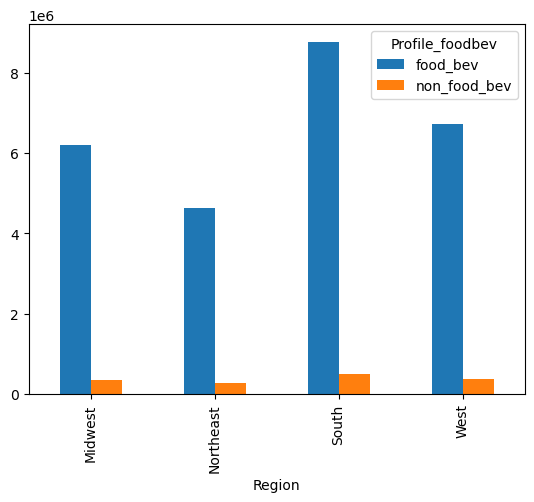

In [62]:
#visualize results
bar_fb_reg = cross_fb_reg.plot.bar()

#### Observation: there is a similar distribution of purchases of food and beverage items versus non-food and beverage items across regions

#### Crosstabs between customer profiles and departments

In [63]:
#create crosstab to analyze income by department
cross_inc_dep = pd.crosstab(df_2['department_id'], df_2['Profile_Income'], dropna = False)

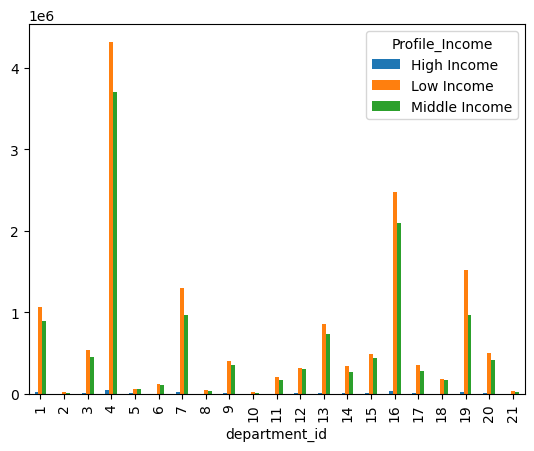

In [64]:
#visualize results
bar_inc_dep = cross_inc_dep.plot.bar()

#### Observations: low income customers represent a higher proportion of purchases of snacks (dept 19), beverages (7) and produce (4); middle income customers purchase items for babies (18) and meat / seafood (12) at a similar magnitude as low income customers. 

In [65]:
#create crosstab to analyze age by department
cross_age_dep = pd.crosstab(df_2['department_id'], df_2['Profile_Age'], dropna = False)

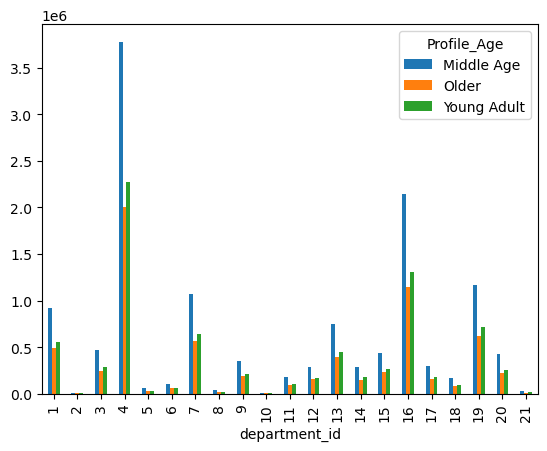

In [66]:
#visualize results
bar_age_dep = cross_age_dep.plot.bar()

#### observations: purchasing trends are similar across departments for the various age groups of customers; older customers purchase disproportionately more deli (18), meat/seafood (12), personal care (11), dry goods/pasta (9) and international (6) goods than young customers (<35).

In [67]:
#create crosstab to analyze family status by department
cross_family_dep = pd.crosstab(df_2['department_id'], df_2['Profile_Dependants'], dropna = False)

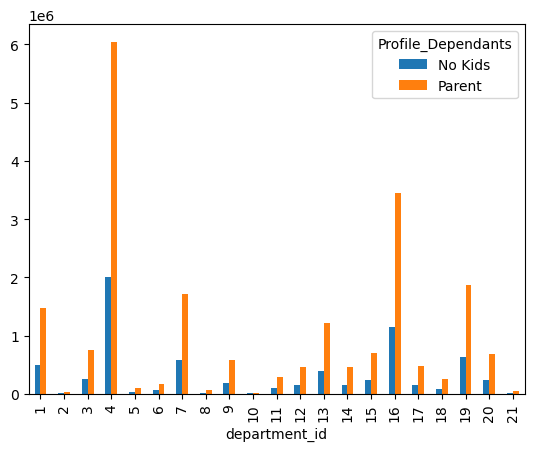

In [68]:
#visualize results
bar_family_dep = cross_family_dep.plot.bar()

#### observations: parents purchase disproportionately more items for babies (18), breakfast (14), and meat/seafood (12) than those customers with no kids. 

# Export Data & Visualizations

In [72]:
df_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_frequent.pkl'))

In [ ]:
#export visualization
bar_inc_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_inc_reg.png'))

In [ ]:
#export visualization
bar_age_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_reg.png'))

In [ ]:
#export visualization
bar_dep_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dep_reg.png'))

In [ ]:
#export visualization
bar_fb_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_fb_reg.png'))

In [ ]:
#export visualization
bar_inc_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_inc_dep.png'))

In [ ]:
#export visualization
bar_age_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_dep.png'))

In [ ]:
#export visualization
bar_family_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_dep.png'))